In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import plots # Custom functions for plotting

# Tricking your cerebellum
## Exercise 4 – Motor Noise (Group A)

By: Ieva Kerseviciute* and Robin Uhrich*

*equal contribution

## Task 1: Implementation of motor noise

### Implement motor noise as additional perturbation

We define these global variables to control the noise strength throughout the blocks and each invididual trial:

```{python}
noise_mean = 0
noise_std = 0
noise_active = False
noise_instance = 0
```

The noise is sampled from a random distribution:

```{python}
def sample_random_noise():
    global noise_mean, noise_std
    return np.random.normal(noise_mean, noise_std)
```

Noise is applied as soon as the pint leaves the control zone:

```{python}
def apply_noise():
    global pint_velocity, noise_instance
    pint_velocity[0] += noise_instance

# PINT_MOVEMENTS
def handle_mouse_input():
    ...
    else:
        ...
        apply_noise()
       ...
    ...
```

### Display the text 'Drinking beer' and light up the yellow in the beer pint after the motor noise has been increased

We display the text and change the color of the beer when setting up the block. Noise parameters are set when defining the blocks:

```{python}
...

friction_decrease = 0.003   
BASE_FRICTION = 0.99 - (3 * friction_decrease)

...

def setup_block(block_number):
    ...

    drink_beer = block.get("drink_beer", False)
    if drink_beer:
        display_message("Drinking beer!", length = 2000)
        beer_alpha -= beer_alpha_decrease
        if friction + friction_decrease < 1:
            friction += friction_decrease

    noise_active = block.get("noise_active", False)
    noise_mean = block.get("noise_mean", 0)
    noise_std = block.get("noise_std", 0)

    # Generate new perturbation noise
    if noise_active:
        noise_instance = sample_random_noise()
    else:
        noise_instance = 0

    ...
```

### Design your own experiment to test effect of motor noise

```{python}
small_noise_mean = 0
small_noise_std = 1

medium_noise_mean = 1.5
medium_noise_std = 2

large_noise_mean = 2.5
large_noise_std = 3

sudden_force = 2
n_trials_no_perturbation = 10
n_trials_perturbation = 30
feedback_setting = "endpos"

block_structure = [
    # 1
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": False,
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": False
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": False
    },

    # 2
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": True,
        "noise_active": True, "noise_mean": small_noise_mean, "noise_std": small_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": True, "noise_mean": small_noise_mean, "noise_std": small_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": True, "noise_mean": small_noise_mean, "noise_std": small_noise_std
    },

    # 3
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": True,
        "noise_active": True, "noise_mean": medium_noise_mean, "noise_std": medium_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": True, "noise_mean": medium_noise_mean, "noise_std": medium_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": True, "noise_mean": medium_noise_mean, "noise_std": medium_noise_std
    },

    # 4
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": True,
        "noise_active": True, "noise_mean": large_noise_mean, "noise_std": large_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_perturbation,
        "perturbation": True, "gradual": False, "sudden_force": sudden_force,
        "drink_beer": False,
        "noise_active": True, "noise_mean": large_noise_mean, "noise_std": large_noise_std
    },
    {
        "feedback": feedback_setting, "num_trials": n_trials_no_perturbation,
        "perturbation": False,
        "drink_beer": False,
        "noise_active": True, "noise_mean": large_noise_mean, "noise_std": large_noise_std
    }
]
```


## Task 2: Analysis of motor noise on unbiased subjects

By the end of the trials, the unbiased subject got a bit annoyed with the task and tended to perform shorter throws in order to get the experiment over with quicker.

In [2]:
# Read subject data
experiment, full_experiment = plots.define_experiment()

subject1 = pd.read_csv("Subject_1.csv")
subject1 = pd.merge(subject1, full_experiment, on = "Trial")

In [3]:
small_noise_mean = 0
small_noise_std = 1

medium_noise_mean = 1.5
medium_noise_std = 2

large_noise_mean = 2.5
large_noise_std = 3

x = np.linspace(-10, 12, 1000)
y_small = norm.pdf(x, small_noise_mean, small_noise_std)
y_medium = norm.pdf(x, medium_noise_mean, medium_noise_std)
y_large = norm.pdf(x, large_noise_mean, large_noise_std)

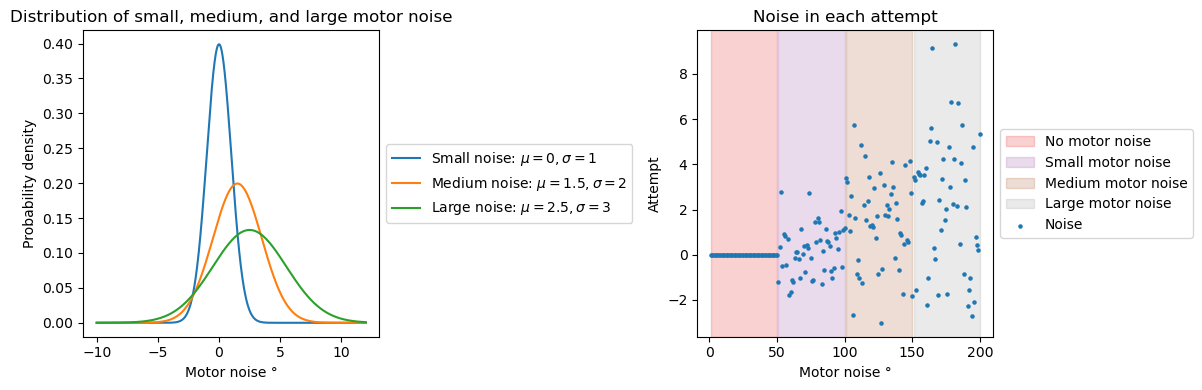

In [4]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

axs[0].plot(x, y_small, label = rf"Small noise: $\mu = {small_noise_mean}, \sigma = {small_noise_std}$")
axs[0].plot(x, y_medium, label = rf"Medium noise: $\mu = {medium_noise_mean}, \sigma = {medium_noise_std}$")
axs[0].plot(x, y_large, label = rf"Large noise: $\mu = {large_noise_mean}, \sigma = {large_noise_std}$")
axs[0].set_xlabel("Motor noise °")
axs[0].set_ylabel("Probability density")
axs[0].set_title("Distribution of small, medium, and large motor noise")
axs[0].legend(loc = "center left", bbox_to_anchor = (1, 0.5))

colors, unique_periods = plots.get_experiment_colors(experiment)

# Show the different experimental periods
for i, change in experiment.iterrows():
    label = change.Type if change.Type in unique_periods else ""
    unique_periods = unique_periods[unique_periods != change.Type]

    start = change.Trial
    end = change.TrialEnd

    axs[1].axvspan(
        start, end,
        alpha = 0.2,
        label = label,
        color = colors.get(change.Type)
    )

axs[1].scatter(
    subject1.Trial,
    subject1.NoiseInstance,
    s = 5,
    label = "Noise"
)
axs[1].legend(loc = "center left", bbox_to_anchor = (1, 0.5))
axs[1].set_title("Noise in each attempt")
axs[1].set_xlabel("Motor noise °")
axs[1].set_ylabel("Attempt")

fig.tight_layout()
plt.show()

**Figure 1.** (Left) Distributions of the motor noise used throughout the experiment. (Right) Individual noise instances during each attempt.

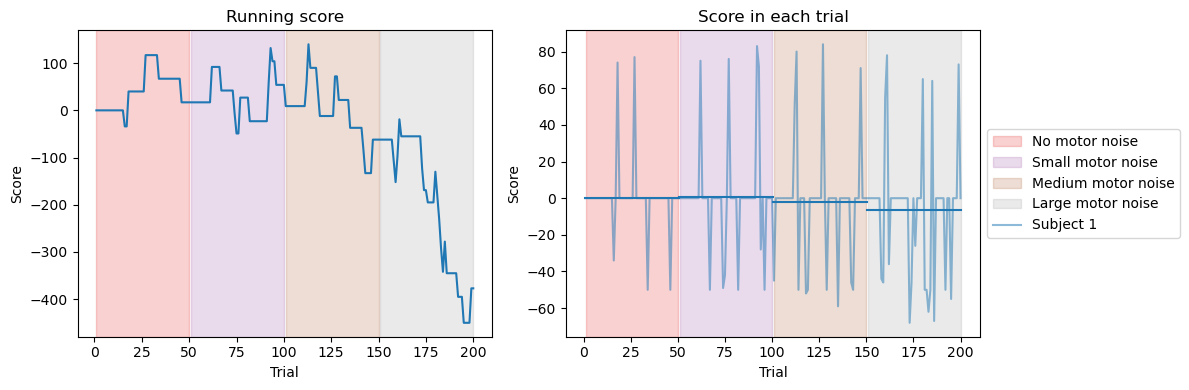

In [5]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
plots.plot_running_score(experiment, subjects = [subject1], ax = axs[0], show_legend = False)
plots.plot_trial_score(experiment, subjects = [subject1], ax = axs[1])
fig.tight_layout()

**Figure 2.** (Left) The running score across the experiment and (right) the score for each trial, with vertical lines representing the mean score for each block, for subject 1. The different experimental blocks are visually highlighted. The subject shows a significant decline in performance during the final block.

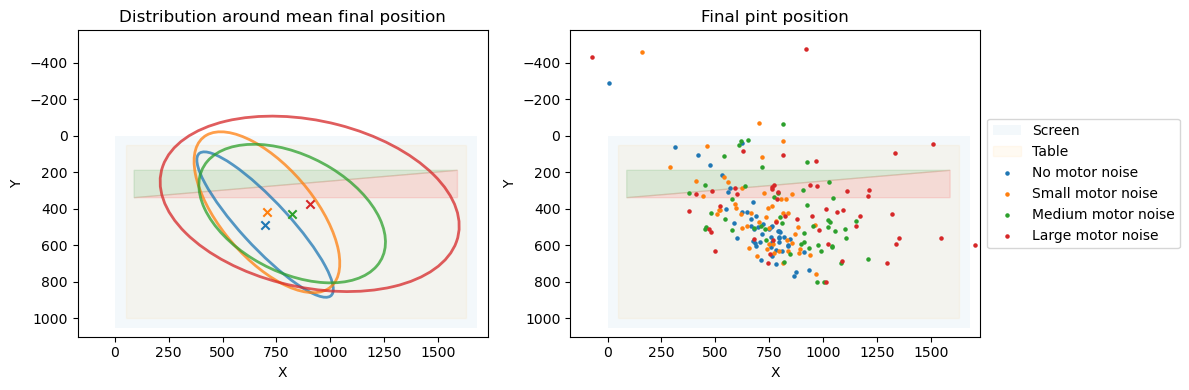

In [6]:
plots.plot_throw_positions(subject1)

**Figure 3.1.** Final pint positions for subject 1. (Right) The mean final position, marked by a cross, and its error, marked by the confidence ellipse. (Left) Final pint position for all trials. The experimental blocks are marked by different colors. The variability of the final position tends to increase with increasing motor noise.

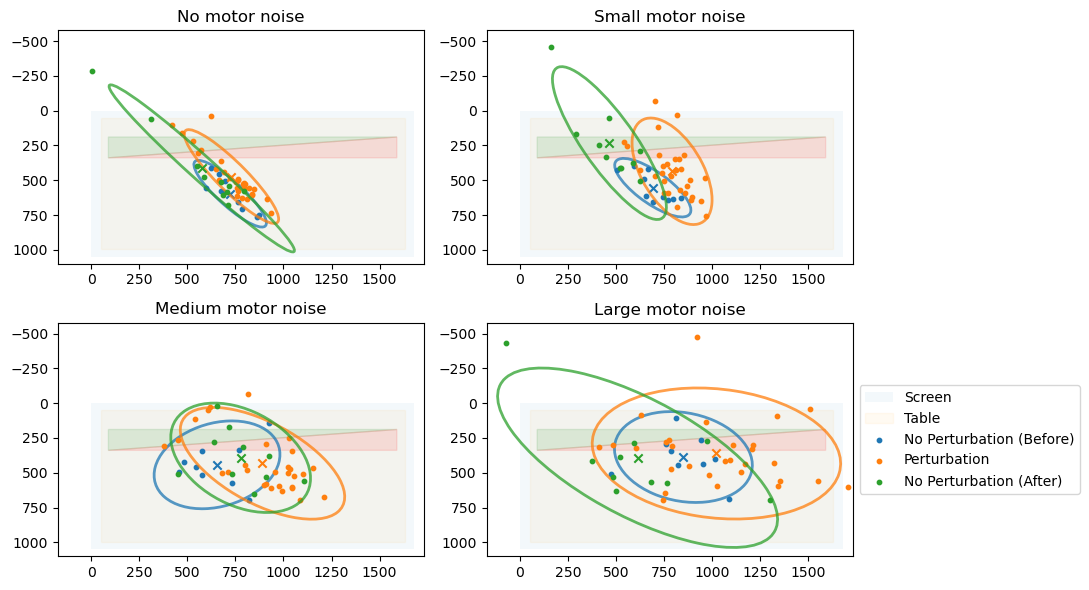

In [7]:
plots.plot_throw_perturbation(subject1)

**Figure 3.2.** Final pint positions, their mean and confidence ellipse during no perturbation and perturbation periods of each experimental block for subject 1. For all blocks, perturbed attempts are shifted in the direction of perturbation. For small motor noise and large motor noise there is a visible after-effect, and the mean of the final position is shifted in the direction opposite to perturbation.

## Task 3: Discussion

**Is feedback still helpful even if motor noise is present? How large can the motor noise be until learning no longer takes place?**

We notice that the subject's performance declines with increasing motor noise, and their attempts appear more random. It is difficult to attribute this to the induced noise alone; during the experiment, the subject was getting increasingly annoyed when they could not control the pint, and started performing random throws out of frustration by the end of the experiment.

However, in the case of the small motor noise, the subject has clearly learned to adapt to the induced perturbation. This is visible in the after effect - the unperturbed trials after the perturbation are shifted in the opposite direction to the perturbation, stronger than before the perturbation was induced. For the medium motor noise, the effect is not as pronounced. In the case of the large motor noise, no comment can be made - it is unclear whether the subject learned something or the observed after-effect appears by chance.

Overall, the feedback is helpful when the noise is not too strong and the subject can still link their actions to the results they produce (and thus successfully update the internal model). Even though this process is supposed to be subconscious, the large noise was quite strong and the subject noticed that the system does not behave as they expect, thus getting frustrated and performing poorly. So, the second question is more difficult to answer with this specific experiment (or at least the data we have). 


## Task 4

Defining correct experimental setting is as important as the experiment itself. We noticed that with our initial settings, the subject found it difficult to perform the task due to the friction parameter. So, we performed additional experiments which allowed to choose this parameter more precisely.